Lec 8: Simon's Problem
    
2026/2/2

3-qubit Simon example

In [1]:
from qiskit import __version__
print(__version__)

1.3.2


In [2]:
# import libraries
from qiskit import QuantumCircuit, transpile

# Quantum Circuit
from qiskit.primitives import Sampler

# Run with simulators
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import Sampler as AerSampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Visualzation
from qiskit.visualization import plot_histogram


0


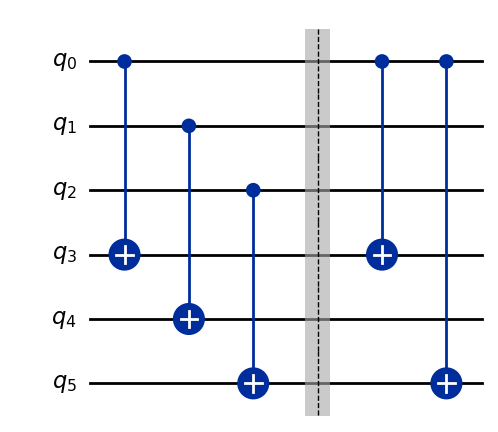

In [3]:
# 3-qubit oracle 
s = '101'  # hidden bitstring
n = len(s)

# create the Simon's 3-qubit circuit
simon3s101 = QuantumCircuit(n*2)

# apply CNOT gates
for q in range(n):
    simon3s101.cx(q, q+n)

simon3s101.barrier()

# find '1' in the string for  CNOT gates
i = s.find('1')
print(i)

# apply CNOT gatess
for q in range(n):
    if (s[q] ==  "1"):
        simon3s101.cx(i, q+n)

# draw the circuit
simon3s101.draw('mpl')


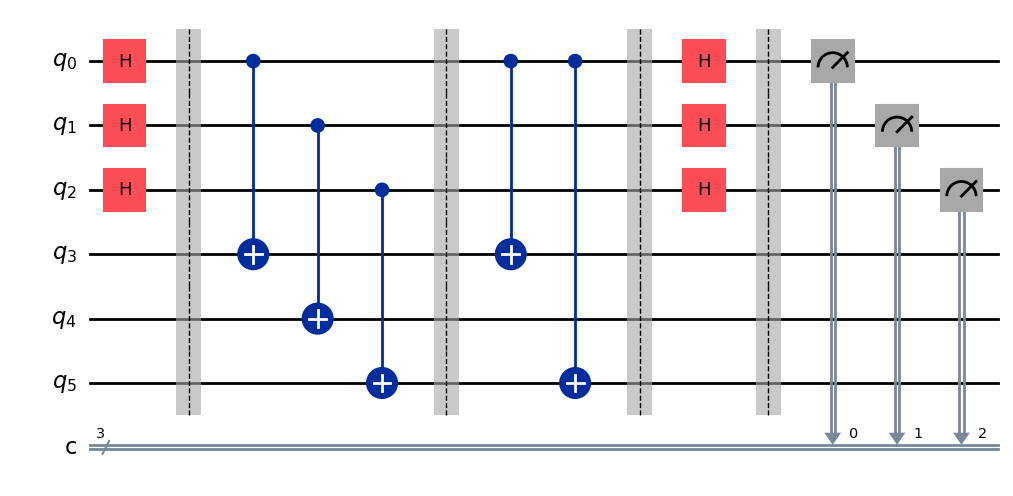

In [4]:
# 3-qubit full circuit
# create quantum circuit
simon_circuit_3s101 = QuantumCircuit(2*n, n)

# Apply H-gate before querying the oracle
simon_circuit_3s101.h(range(n))
simon_circuit_3s101.barrier()

# Query oracle
simon_circuit_3s101 = simon_circuit_3s101.compose(simon3s101)
simon_circuit_3s101.barrier()

# Apply H-gate to the input register
simon_circuit_3s101.h(range(n))
simon_circuit_3s101.barrier()

# Measure qubits
simon_circuit_3s101.measure(range(n), range(n))

# Circuit visualization
simon_circuit_3s101.draw('mpl')

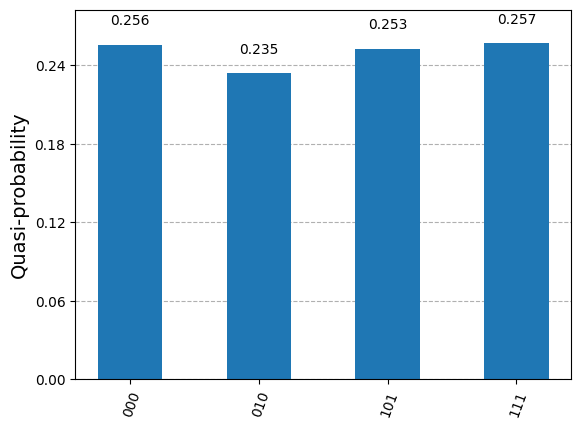

In [5]:
#  experiment with Aer Simulator
backend = AerSimulator()

pm = generate_preset_pass_manager(backend=backend, optimization_level=3)

sampler = AerSampler()

# simulate
job_sim = sampler.run([simon_circuit_3s101], shots=4096)

quasi_dists = job_sim.result().quasi_dists[0].binary_probabilities()

# plot the results
plot_histogram(quasi_dists)
